In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

'''
# for colab use
from google.colab import files
uploaded = files.upload()
'''

df_train = pd.read_csv('d_reg_tra.txt',sep='\s+',names=["X","y"])
df_val = pd.read_csv('d_reg_val.txt',sep='\s+',names=["X","y"])

Saving d_reg_val.txt to d_reg_val (1).txt
Saving d_reg_tra.txt to d_reg_tra (1).txt


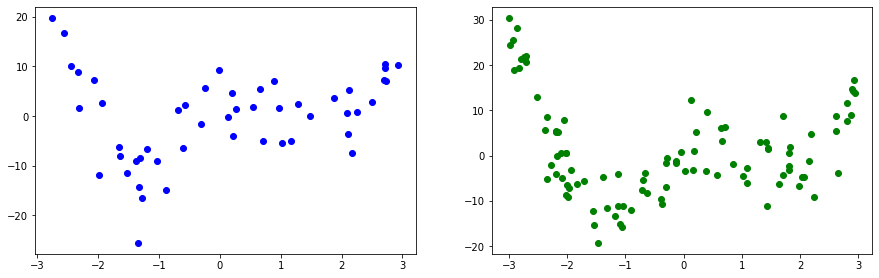

In [0]:
# visualize the train and validation data
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.scatter(df_train['X'],df_train['y'], c='b')
plt.subplot(222)
plt.scatter(df_val['X'],df_val['y'], c='g')
plt.show()

In [0]:
# choose random initial centroids for k clusters
def select_centers(X,k):
    ran_args = np.random.choice(len(X),k)
    centers = X[ran_args]

    return centers

In [0]:
# 1D kmeans
def kmeans(points,K):
  centroids = select_centers(points,K)
  classifications = np.zeros((len(points)), dtype=np.int)
  
  for i in range(10):
    # Assign each point to its nearest centroid. Store this in classifications,
    # where each element will be an int from 0 to K-1.

    for i in range(points.shape[0]):
      smallestDistance = 0
      for k in range(K):
        distance = abs(points[i] - centroids[k])
        if k == 0:
          smallestDistance = distance
          classifications[i] = k
        elif distance < smallestDistance:
          smallestDistance = distance
          classifications[i] = k

    # recalculate the centroid of a cluster.
    for k in range(K):
      if sum(classifications == k) > 0:
        centroids[k] = sum(points[classifications == k]) / sum(classifications == k)

  return centroids

In [0]:
# Gives a constant spread value provided from all cluster centroids
def find_spread(cluster_means):
    max_dist = 0
    for i in cluster_means:
        for j in range(len(cluster_means)):
            # print(l)
            # print(cluster_means[j])
            s = np.sqrt(np.sum((i - cluster_means[j])**2))
            # print('s:',s)
            if s > max_dist:
                max_dist = s
    return max_dist/np.sqrt(len(cluster_means))

In [0]:
# plot the trained RBF on the original points
def plot(X,y,y_pred,k,train):
  plt.scatter(X, y, c='c',label='actual')
  plt.scatter(X, y_pred, c='m', marker='^', label='w*ph')
  plt.grid(True)
  if train == True:
    title = 'Actual vs w*ph for k:{} on Train Data:'.format(k)
  else:
    title = 'Actual vs w*ph for k:{} on Val. Data:'.format(k)
  plt.title(title)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.legend()
  plt.show()

In [0]:
# root mean square error (RMSE)
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [0]:
class RBF():
  def __init__(self, k=5, learning_rate=0.01, epochs=100,rul_exc=False):
    self.k = k
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.w = np.random.randn(self.k)
    self.b = np.random.randn(1)
    self.rul_exc = False
    self.v = []
  
  # train RBF, update the weights and bias
  def rbf(self,X,y,centroids,sh):
    ph = np.zeros(self.k)
    self.v = np.random.randn(len(X))
    for epoch in range(self.epochs):
      for i in range(len(X)):
        for j in range(self.k):
          ph[j] = np.exp(-1 * np.power(X[i] - centroids[j],2)/2*np.power(sh,2))
        
        # True if rules and exceptions are applied
        if self.rul_exc == False:
          yt = ph.T.dot(self.w) + self.b
          #print('yt:',yt[0])
        else:
          yt = ph.T.dot(self.w) + v.T.dot(X) + self.b
          
        loss = (y[i] - yt[0])**2

        # print('loss:',loss)

        error = -(y[i] - yt[0])
        #print('error:',error)
        self.w = self.w - (self.learning_rate * ph * error)
        self.b = self.b - (self.learning_rate * error)
        self.v = self.v - (self.learning_rate * X *  error)

  # train and predict to be used for the train data
  def fit_predict(self,X,y):
    centroids = kmeans(X,self.k)
    sh = find_spread(centroids)
    ph = np.zeros(self.k)
    self.rbf(X,y,centroids,sh)
    y_pred = []
    for i in range(len(X)):
      for j in range(self.k):
        ph[j] = np.exp(-1 * np.power(X[i] - centroids[j],2)/2*np.power(sh,2))
      
      if self.rul_exc == False:
        yt = ph.T.dot(self.w) + self.b
      else:
        yt = ph.T.dot(self.w) + self.v.T.dot(X) + self.b

      y_pred.append(yt)
    return np.array(y_pred)

  # for the validation/test data (no training)
  def predict(self,X,y):
    centroids = kmeans(X,self.k)
    ph = np.zeros(self.k)
    sh = find_spread(centroids)
    y_pred = []
    for i in range(len(X)):
      for j in range(self.k):
        ph[j] = np.exp(-1 * np.power(X[i] - centroids[j],2)/2*np.power(sh,2))
      
      if self.rul_exc == False:
        yt = ph.T.dot(self.w) + self.b
      else:
        yt = ph.T.dot(self.w) + self.v.T.dot(X) + self.b

      y_pred.append(yt)
    return np.array(y_pred)

In [0]:
'''
k = 3 is used to train the network, values starting from 9
cause an overfit for the given data
'''

k=3
rbf = RBF(k, learning_rate=0.01,epochs=100,rul_exc=False)
y_pred_tra = rbf.fit_predict(df_train['X'].values,df_train['y'].values)
y_pred_val = rbf.predict(df_val['X'].values,df_val['y'].values)

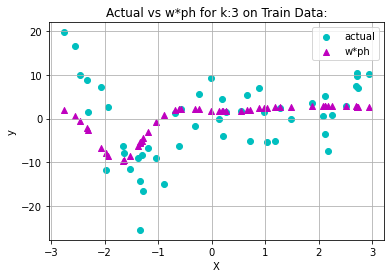

In [0]:
plot(df_train['X'].values,df_train['y'].values,y_pred_tra,k,train=True)

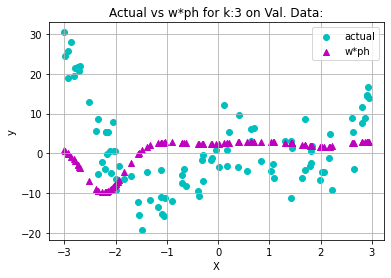

In [0]:
plot(df_val['X'].values,df_val['y'].values,y_pred_val,k,train=False)

In [0]:
# rmse for the train prediction vs actual data
rmse(y_pred_tra,df_train['y'].values)

9.592325313619176

In [0]:
# rmse for the validation prediction vs actual data
rmse(y_pred_val, df_val['y'].values)

11.663072802327315

In [0]:
# loop 10 times for a given k value and return average rmse
# rules and exceptions not applied
def loop_rbf(k):
  train_rmse = 0
  
  for i in range(10):
    rbf = RBF(k, learning_rate=0.01,epochs=100,rul_exc=False)
    y_pred_tra = rbf.fit_predict(df_train['X'].values,df_train['y'].values)
    train_rmse += rmse(y_pred_tra,df_train['y'].values)
  
  return train_rmse/10

# loop 10 times for a given k value and return average rmse
# rules and exceptions applied
def loop_rbf_rul(k):
  train_rmse = 0
  
  for i in range(10):
    rbf = RBF(k, learning_rate=0.01,epochs=100,rul_exc=True)
    y_pred_tra = rbf.fit_predict(df_train['X'].values,df_train['y'].values)
    train_rmse += rmse(y_pred_tra,df_train['y'].values)
  
  return train_rmse/10

In [0]:
# average rmse values over a variety of cluster numbers are stored in separate lists
H = [2,3,4,5,8,9]
train_rmse = []
train_rmse_rul = []
val_rmse = []
val_rmse_rul = []
for k in H:
  train_rmse.append(loop_rbf(k))
  train_rmse_rul.append(loop_rbf_rul(k))
  val_rmse.append(loop_rbf(k))
  val_rmse_rul.append(loop_rbf_rul(k))

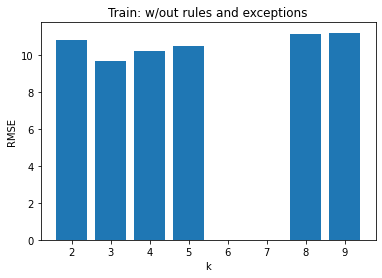

In [0]:
plt.title('Train: w/out rules and exceptions')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.bar(H,train_rmse)
plt.show()

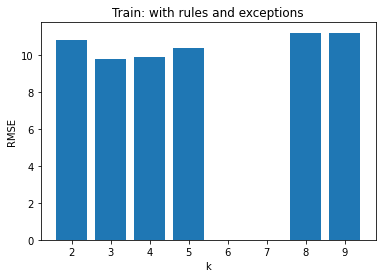

In [0]:
plt.title('Train: with rules and exceptions')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.bar(H,train_rmse_rul)
plt.show()

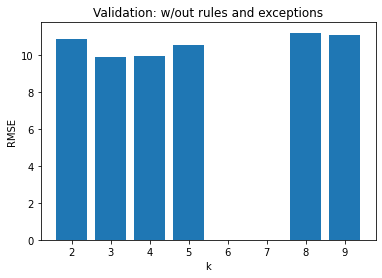

In [0]:
plt.title('Validation: w/out rules and exceptions')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.bar(H,val_rmse)
plt.show()

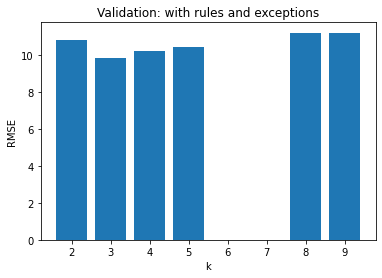

In [0]:
plt.title('Validation: with rules and exceptions')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.bar(H,val_rmse_rul)
plt.show()